# Module 11 Challenge
## Part 2: Scrape and Analyse Mars Weather Data

In [103]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [105]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [106]:
# Create a Beautiful Soup Object

soup = BeautifulSoup(browser.html, 'html.parser')

In [107]:
# Extract all rows of data
bs4_obj = soup.find('div', class_='container-fluid py-5')

# Check if the <div> element is found
if bs4_obj:
    # Find the table within the <div> element
    table = bs4_obj.find('table')
    
    # Check if the table is found
    if table:
        # Extract all rows of data from the table
        rows = table.find_all('tr')
        print(rows)
        
    else:
        print("Table not found within the specified <div> element.")
else:
    print("Specified <div> element not found on the webpage.")

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [108]:
# Create an empty list
table_data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the table cells (td elements)
    cells = row.find_all('td')
    

    row_data = [cell.get_text(strip=True) for cell in cells]

    if any(row_data):
        # Append the non-empty row_data to table_data
        table_data.append(row_data)
print(table_data)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [109]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
rows = table_data
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

df = pd.DataFrame(table_data, columns=columns)

In [110]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [111]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [112]:
# Change data types for data analysis

#convert to datetime datatype
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

#convert this columns into float dataty 
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

#convert this columns into int
int_columns = ['id', 'sol', 'ls', 'month']
df[int_columns] = df[int_columns].astype(int)

In [113]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [114]:
# 1. How many months are there on Mars?

#total months with the valuee counts
df['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [115]:
# 2. How many Martian days' worth of data are there?

mar_days = df.sol.nunique()
mar_days

1867

In [116]:
# 3. What is the average low temperature by month?

#group two columns month and min_temp and then mean()
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


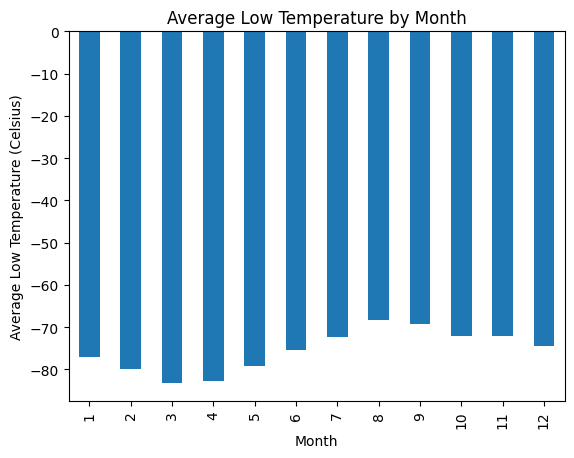

In [117]:
# Plot the average temperature by month

avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (Celsius)', title='Average Low Temperature by Month')
plt.xticks(rotation=90)  # rotate x-axis labels
plt.show()


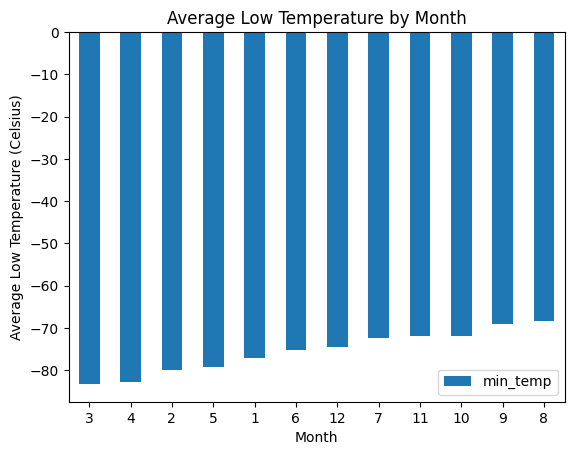

In [118]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Find the coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()

# Plot the average low temperature by month
avg_min_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (Celsius)', title='Average Low Temperature by Month')

# Show legend
plt.legend()

# Show the plot
plt.xticks(rotation=0)
plt.show()


In [119]:
# 4. Average pressure by Martian month


avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# o/p
print("Average pressure by Martian month:" )
print(avg_pressure_by_month)

Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


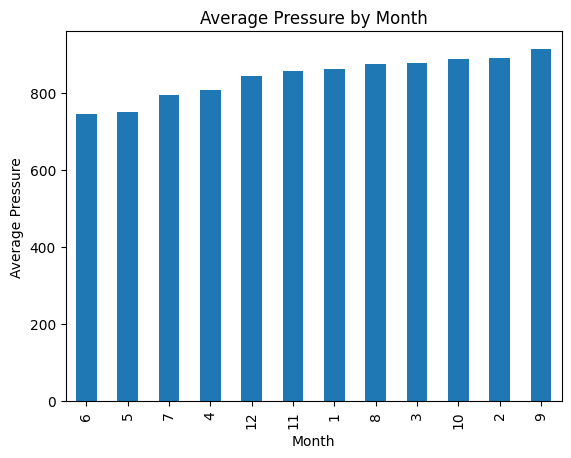

In [120]:
# Plot the average pressure by month

avg_pressure_by_month = df.groupby('month')['pressure'].mean()
avg_pressure_by_month = avg_pressure_by_month.sort_values()
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Pressure', title='Average Pressure by Month')
plt.xticks(rotation=90)  
plt.show()

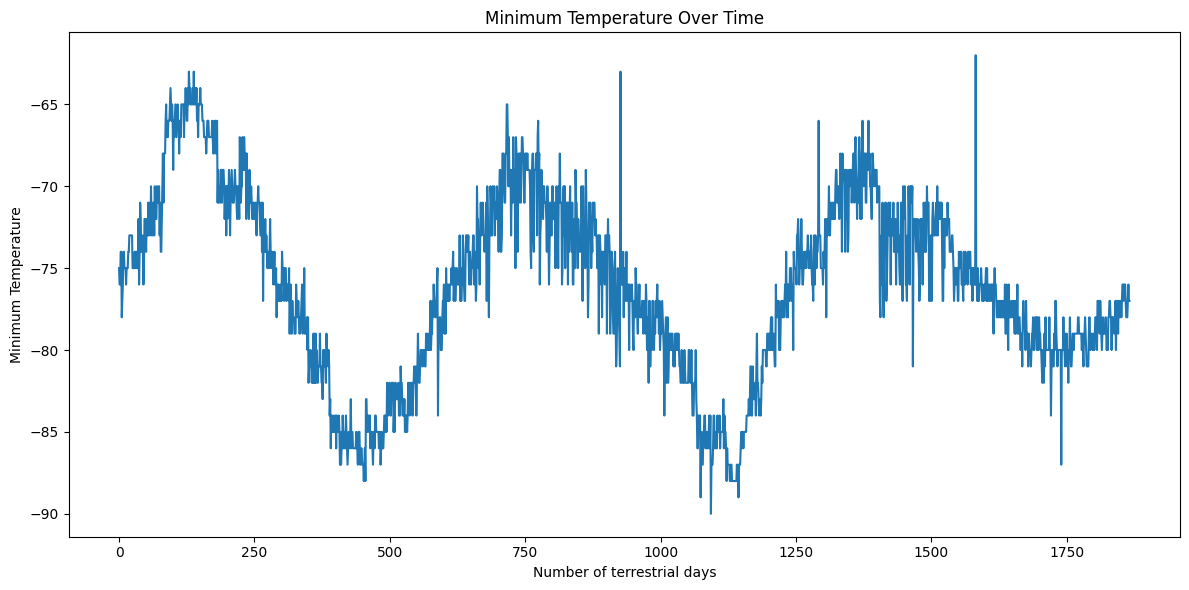

In [121]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'].index, df['min_temp'], linestyle='-')
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.tight_layout()
plt.show()

Typically, Mars experiences its lowest minimum temperatures during the third month and its highest temperatures during the eighth month, although these temperatures remain exceedingly cold by human standards. The atmospheric pressure tends to reach its lowest point around the sixth month and its highest around the ninth month. 

The interval between temperature peaks spans approximately 675 days, based on observations. While it may seem like a Mars year lasts for about 675 days according to the data, further research confirms that it actually spans approximately 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [126]:
# Write the data to a CSV
df.sort_values(by='id',inplace= True)
df.to_csv('export_data.csv',index= False)

In [317]:
browser.quit()